# Medical Text Data Cleaning

**Natural Language Prodigies** | *Phase 4 Project* 

## Data Overview and Problem Description

Project goals here

Link to data [here](https://www.kaggle.com/datasets/chaitanyakck/medical-text/data?select=train.dat), context below

`Medical abstracts describe the current conditions of a patient. Doctors routinely scan dozens or hundreds of abstracts each day as they do their rounds in a hospital and must quickly pick up on the salient information pointing to the patient’s malady. You are trying to design assistive technology that can identify, with high precision, the class of problems described in the abstract. In the given dataset, abstracts from 5 different conditions have been included: digestive system diseases, cardiovascular diseases, neoplasms, nervous system diseases, and general pathological conditions.`

`The training dataset consists of 14438 records and the test dataset consists of 14442 records. The train data has classes whereas, the test data classes are needed to be predicted.`

## Imports

In [1]:
import pandas as pd
import numpy as np

# NLTK
import nltk
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

import string
import re

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Load In Data

In [2]:
with open('../data/train.dat', 'r') as file:
    raw_data = file.read()
    
rows = raw_data.split('\n')

In [3]:
rows = raw_data.split('\n')

In [4]:
df = pd.DataFrame(rows, columns=['raw'])
df[['class', 'raw']] = df['raw'].str.split('\t', n=1, expand=True)

df.drop(14438, axis=0, inplace=True)
df['class'] = df['class'].astype('int')

1. neoplasms
2. digestive system diseases
3. nervous system diseases
4. cardiovascular diseases
5. general pathological conditions

https://github.com/sebischair/medical-abstracts-tc-corpus

In [5]:
df.head()

,raw,class
0,Catheterization laboratory events and hospital...,4
1,Renal abscess in children. Three cases of rena...,5
2,Hyperplastic polyps seen at sigmoidoscopy are ...,2
3,Subclavian artery to innominate vein fistula a...,5
4,Effect of local inhibition of gamma-aminobutyr...,4


## EDA

In [6]:
df['class'].value_counts()

class
5    4805
1    3163
4    3051
3    1925
2    1494
Name: count, dtype: int64

In [7]:
df.raw[df['class'] == 1]

5        Infection during chronic epidural catheterizat...
16       Cutaneous manifestations of multiple myeloma. ...
18       Ewing's sarcoma. Radiotherapy versus surgery f...
20       Immunohistochemical detection of P-glycoprotei...
22       Follicular thyroid cancer treated at the Mayo ...
                               ...                        
14415    Treatment of angiomas with sclerosing injectio...
14420    Genetic mechanisms of tumor suppression by the...
14429    Primary de novo adenocarcinoma of the colon me...
14434    Mammographic measurements before and after aug...
14435    Use of leukocyte-depleted platelet concentrate...
Name: raw, Length: 3163, dtype: object

In [8]:
df.raw[df['class'] == 1].iloc[1]

"Cutaneous manifestations of multiple myeloma. We report the cutaneous manifestations of multiple myeloma, using a retrospective review of 115 patients' records obtained from tumor registry files. Five patients were found to have biopsy-proved extramedullary plasmacytomas without extension from an underlying bony focus. Twelve patients had ecchymoses without thrombocytopenia; two of them had biopsy-proved amyloidosis. One patient presented with pyoderma gangrenosum and was subsequently diagnosed with multiple myeloma. The last patient initially presented with what clinically appeared to be leukocytoclastic vasculitis, and, in the course of a standard workup, he was diagnosed with multiple myeloma. These findings are discussed with regard to the current literature on the cutaneous manifestations of multiple myeloma. "

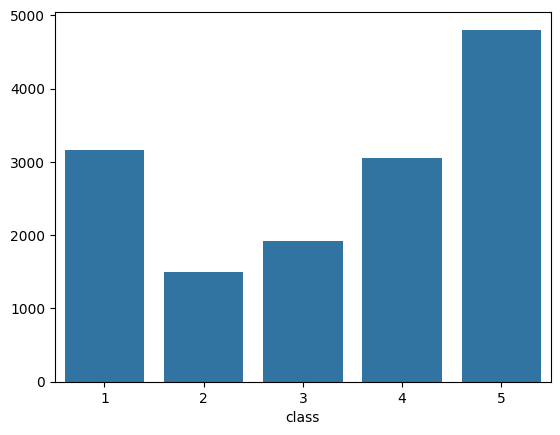

In [9]:
x = df['class'].value_counts().index
y = df['class'].value_counts().values

sns.barplot(x=x, y=y);

## Tokenize and filter

Explain here preprocess function

In [10]:
def tokenize_text(text, tokenizer, stopwords_list):
    # Standardize case (lowercase the text)
    text = text.lower()
    
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords using `stopwords_list`
    filtered_tokens = [word for word in tokens if word not in stopwords_list]
    
    # Return the preprocessed text
    return filtered_tokens

In [11]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)
stopwords_list = stopwords.words('english')

# Test function
tokenize_text(df.raw.iloc[0], tokenizer, stopwords_list)

['catheterization',
 'laboratory',
 'events',
 'hospital',
 'outcome',
 'direct',
 'angioplasty',
 'acute',
 'myocardial',
 'infarction',
 'assess',
 'safety',
 'direct',
 'infarct',
 'angioplasty',
 'without',
 'antecedent',
 'thrombolytic',
 'therapy',
 'catheterization',
 'laboratory',
 'hospital',
 'events',
 'assessed',
 'consecutively',
 'treated',
 'patients',
 'infarctions',
 'involving',
 'left',
 'anterior',
 'descending',
 'n',
 'patients',
 'right',
 'n',
 'circumflex',
 'n',
 'coronary',
 'arteries',
 'groups',
 'patients',
 'similar',
 'age',
 'left',
 'anterior',
 'descending',
 'coronary',
 'artery',
 'years',
 'right',
 'coronary',
 'artery',
 'years',
 'circumflex',
 'coronary',
 'artery',
 'years',
 'patients',
 'multivessel',
 'disease',
 'left',
 'anterior',
 'descending',
 'coronary',
 'artery',
 'right',
 'coronary',
 'artery',
 'circumflex',
 'coronary',
 'artery',
 'patients',
 'initial',
 'grade',
 'antegrade',
 'flow',
 'left',
 'anterior',
 'descending',
 'c

In [12]:
df['tokenized'] = df.raw.apply(lambda x: tokenize_text(x, tokenizer, stopwords_list))

In [13]:
df.head()

,raw,class,tokenized
0,Catheterization laboratory events and hospital...,4,"[catheterization, laboratory, events, hospital..."
1,Renal abscess in children. Three cases of rena...,5,"[renal, abscess, children, three, cases, renal..."
2,Hyperplastic polyps seen at sigmoidoscopy are ...,2,"[hyperplastic, polyps, seen, sigmoidoscopy, ma..."
3,Subclavian artery to innominate vein fistula a...,5,"[subclavian, artery, innominate, vein, fistula..."
4,Effect of local inhibition of gamma-aminobutyr...,4,"[effect, local, inhibition, gamma, aminobutyri..."


## Lemmatize that ish

Now let's build a lemmatization function

In [14]:
def get_wordnet_pos(treebank_tag):
    # Translate nltk POS to wordnet tags
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [15]:
def lemmatize_with_pos(tokens):
    lemmatizer = WordNetLemmatizer()
    pos_tokens = pos_tag(tokens)

    return [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tokens]

In [16]:
df['lemmatized'] = df.tokenized.apply(lemmatize_with_pos)

In [17]:
df.head()

,raw,class,tokenized,lemmatized
0,Catheterization laboratory events and hospital...,4,"[catheterization, laboratory, events, hospital...","[catheterization, laboratory, event, hospital,..."
1,Renal abscess in children. Three cases of rena...,5,"[renal, abscess, children, three, cases, renal...","[renal, abscess, child, three, case, renal, ab..."
2,Hyperplastic polyps seen at sigmoidoscopy are ...,2,"[hyperplastic, polyps, seen, sigmoidoscopy, ma...","[hyperplastic, polyp, see, sigmoidoscopy, mark..."
3,Subclavian artery to innominate vein fistula a...,5,"[subclavian, artery, innominate, vein, fistula...","[subclavian, artery, innominate, vein, fistula..."
4,Effect of local inhibition of gamma-aminobutyr...,4,"[effect, local, inhibition, gamma, aminobutyri...","[effect, local, inhibition, gamma, aminobutyri..."


## Remove more words 

In [18]:
def token_freq(dataframe, column):
    
    for x in range(1,6):
        token_list = []
        for tokens in dataframe[dataframe['class'] == x][column].values:
            token_list.extend(tokens)
            
        fdist = FreqDist(token_list)
        plt.figure(figsize=(12, 4))
        print(f'Class {x}')
        fdist.plot(30);

Class 1


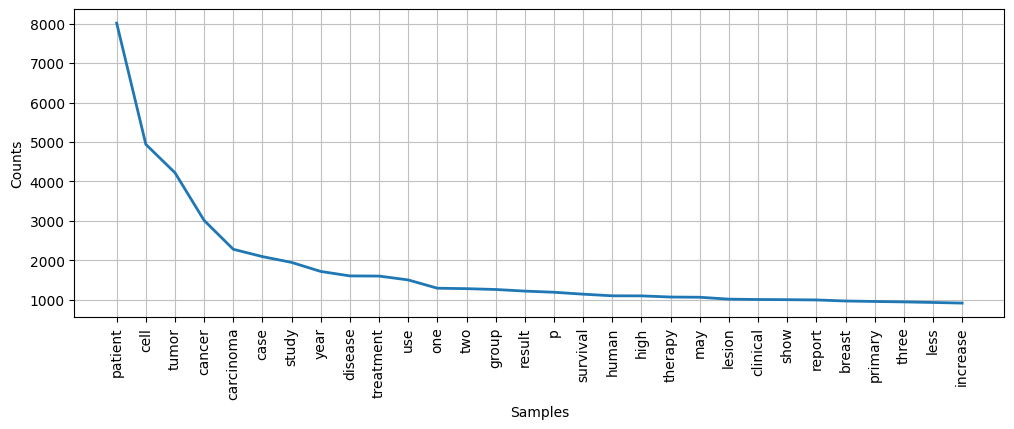

Class 2


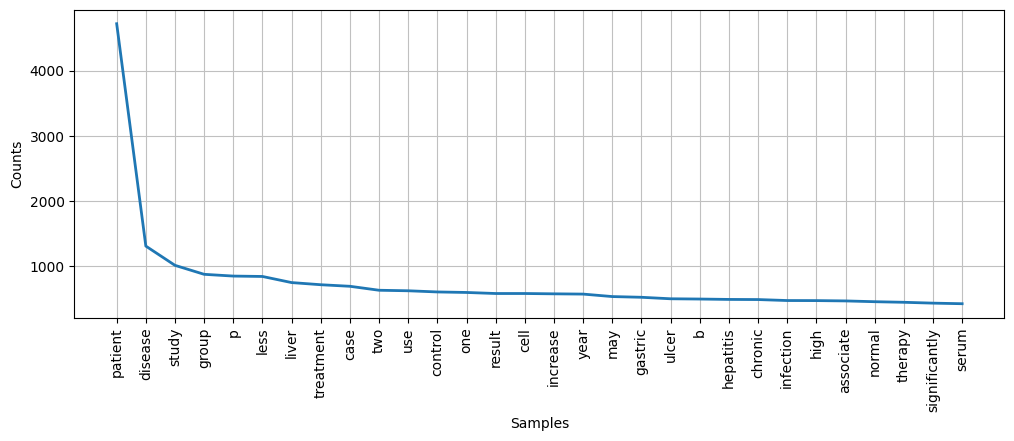

Class 3


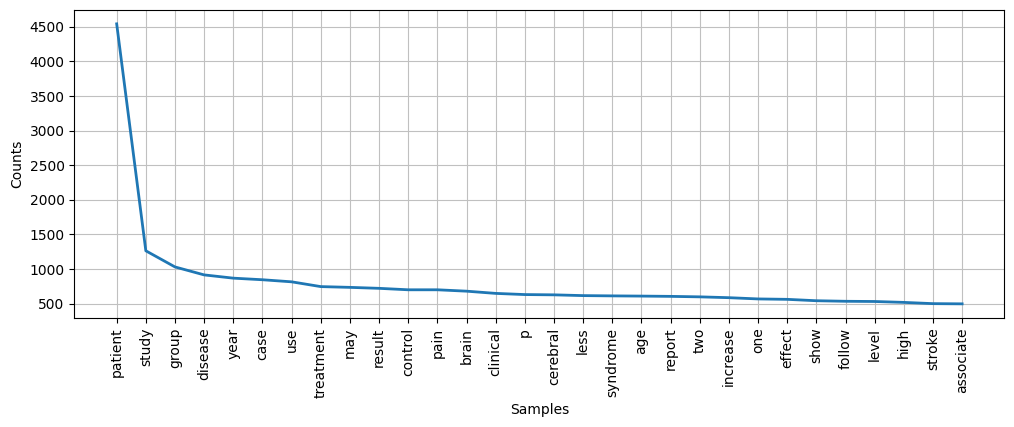

Class 4


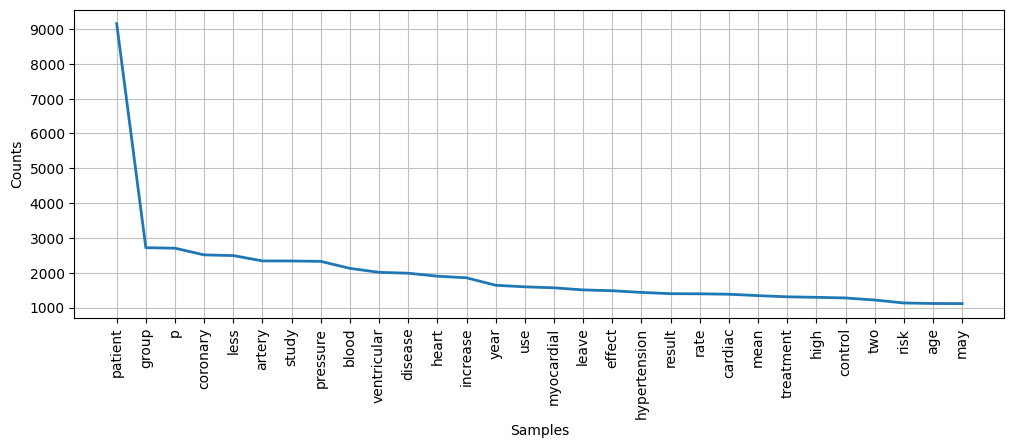

Class 5


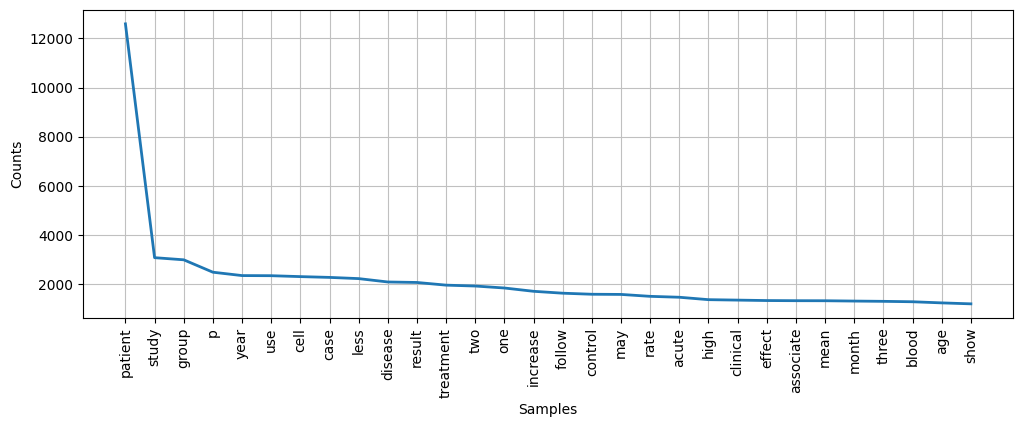

In [19]:
token_freq(df, 'lemmatized')

Remove **patient, study, group, year, use, less, case, treatment, p, n, one, two, disease**

Try everything again with added stopwords

In [20]:
def remove_common_words(tokens, words_list):
    
    # Remove common words using `words_list`
    filtered_tokens = [word for word in tokens if word not in words_list]
    
    # Return the cleaned tokens
    return filtered_tokens

In [21]:
words_list = ['patient', 'study', 'group', 'year', 'use',\
              'less', 'case', 'treatment', 'p', 'n', 'one',\
              'two', 'disease']

df['cleaned'] = df.lemmatized.apply(lambda x: remove_common_words(x, words_list))

Class 1


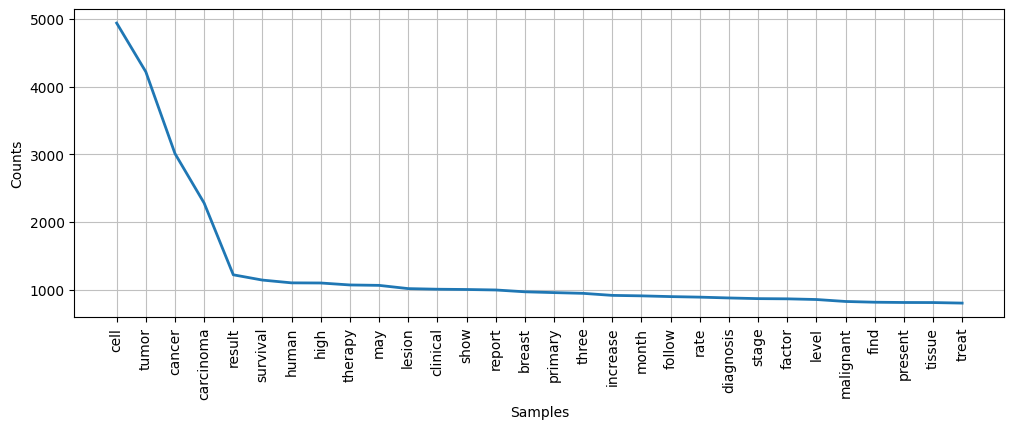

Class 2


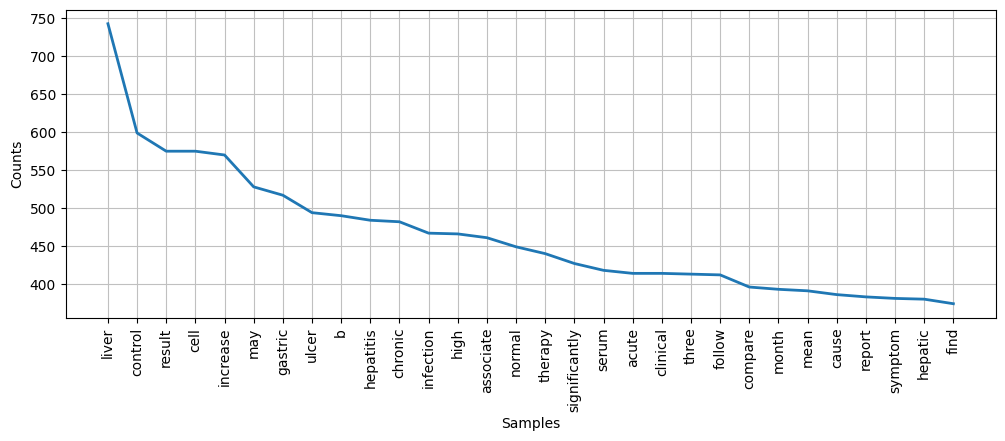

Class 3


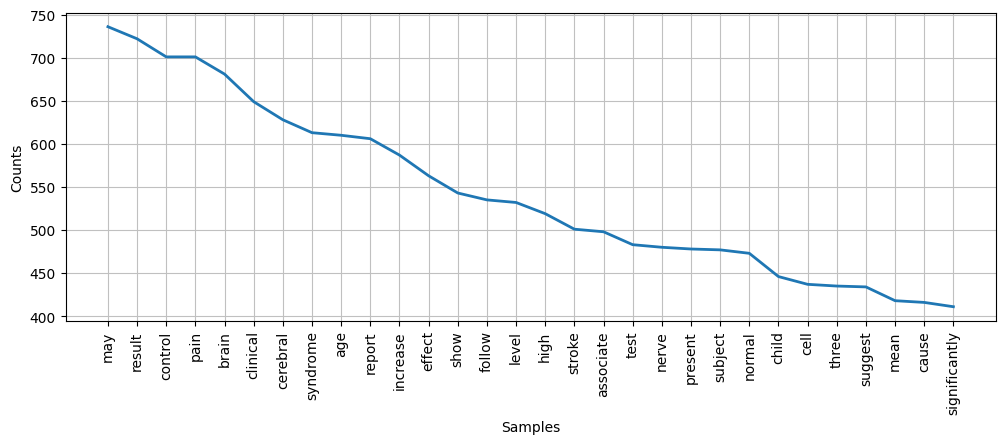

Class 4


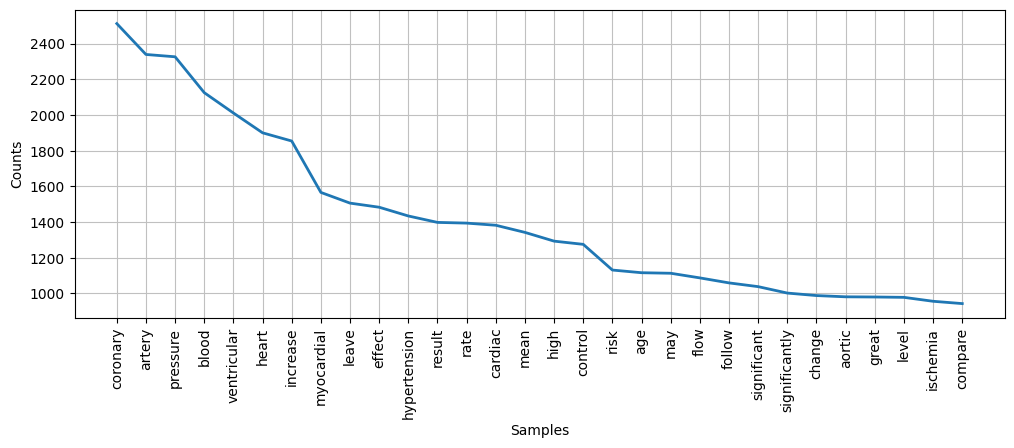

Class 5


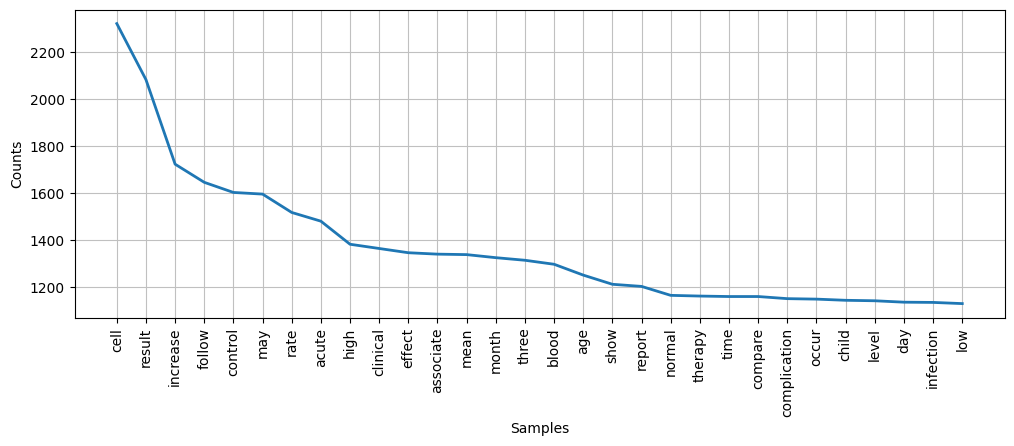

In [22]:
token_freq(df, 'cleaned')

## Finalize cleaned dataframe and save down

In [23]:
df.head()

,raw,class,tokenized,lemmatized,cleaned
0,Catheterization laboratory events and hospital...,4,"[catheterization, laboratory, events, hospital...","[catheterization, laboratory, event, hospital,...","[catheterization, laboratory, event, hospital,..."
1,Renal abscess in children. Three cases of rena...,5,"[renal, abscess, children, three, cases, renal...","[renal, abscess, child, three, case, renal, ab...","[renal, abscess, child, three, renal, abscess,..."
2,Hyperplastic polyps seen at sigmoidoscopy are ...,2,"[hyperplastic, polyps, seen, sigmoidoscopy, ma...","[hyperplastic, polyp, see, sigmoidoscopy, mark...","[hyperplastic, polyp, see, sigmoidoscopy, mark..."
3,Subclavian artery to innominate vein fistula a...,5,"[subclavian, artery, innominate, vein, fistula...","[subclavian, artery, innominate, vein, fistula...","[subclavian, artery, innominate, vein, fistula..."
4,Effect of local inhibition of gamma-aminobutyr...,4,"[effect, local, inhibition, gamma, aminobutyri...","[effect, local, inhibition, gamma, aminobutyri...","[effect, local, inhibition, gamma, aminobutyri..."


In [24]:
final_df = df[['cleaned', 'class']]

# convert classes from [1, 5] to [0, 4]
final_df['class'] -= 1

C:\Users\heefj\AppData\Local\Temp\ipykernel_9268\4217809332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['class'] -= 1


In [25]:
final_df.head()

,cleaned,class
0,"[catheterization, laboratory, event, hospital,...",3
1,"[renal, abscess, child, three, renal, abscess,...",4
2,"[hyperplastic, polyp, see, sigmoidoscopy, mark...",1
3,"[subclavian, artery, innominate, vein, fistula...",4
4,"[effect, local, inhibition, gamma, aminobutyri...",3


In [26]:
final_df.to_csv('../data/train_cleaned.csv')